# Convolutional neural network for image classification

## Importing the libraries

In [1]:
import tensorflow as tf
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator   #class allows you to perform real-time data augmentation on images
import matplotlib.pyplot as plt
import zipfile
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
tf.__version__

'2.17.1'

In [2]:
!wget https://www.dropbox.com/scl/fi/ojbrq5kyi4mncn08p5asz/cat_dog_2.zip?rlkey=jlk302r4cmu9xqn6pog9a2nj5&st=xzat507v&dl=0

--2025-01-27 04:01:06--  https://www.dropbox.com/scl/fi/ojbrq5kyi4mncn08p5asz/cat_dog_2.zip?rlkey=jlk302r4cmu9xqn6pog9a2nj5
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc515909187082c701a8ba449617.dl.dropboxusercontent.com/cd/0/inline/Ci951Zih8g6CUrW9MaZQ00IL9gm7eQi9sHQ0Bn7Ub7D52oGmHU_ZNgYhfSfph-g0CtlVWX2OtFKQE_Z8htbG16xX1JF99tp3_FJ9r0WC1X4aniHgo9zkRzv9gu9HVEdZXBOO-eFs99vY9-J8nTY5Db6z/file# [following]
--2025-01-27 04:01:06--  https://uc515909187082c701a8ba449617.dl.dropboxusercontent.com/cd/0/inline/Ci951Zih8g6CUrW9MaZQ00IL9gm7eQi9sHQ0Bn7Ub7D52oGmHU_ZNgYhfSfph-g0CtlVWX2OtFKQE_Z8htbG16xX1JF99tp3_FJ9r0WC1X4aniHgo9zkRzv9gu9HVEdZXBOO-eFs99vY9-J8nTY5Db6z/file
Resolving uc515909187082c701a8ba449617.dl.dropboxusercontent.com (uc515909187082c701a8ba449617.dl.dropboxusercontent.com)... 162.125.65.15, 2620

In [3]:
!unzip -q "/content/cat_dog_2.zip?rlkey=jlk302r4cmu9xqn6pog9a2nj5"

## Loading the images

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
#path = '/content/drive/MyDrive/cat_dog_2.zip'
#zip_object = zipfile.ZipFile(file=path, mode='r')
#zip_object.extractall('./')
#zip_object.close()

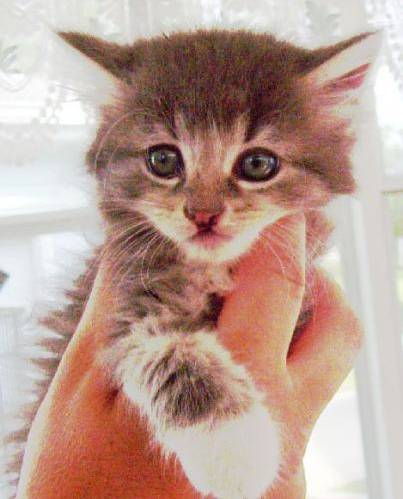

In [4]:
tf.keras.preprocessing.image.load_img('/content/cat_dog_2/training_set/cat/cat.100.jpg')

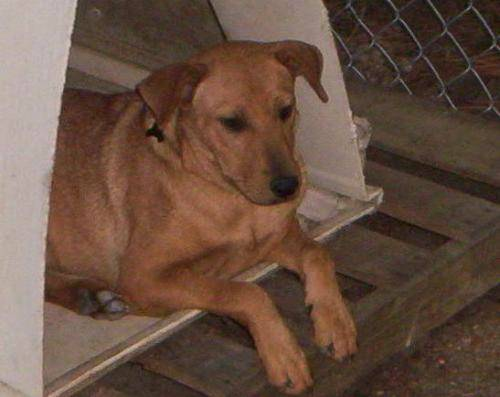

In [5]:
tf.keras.preprocessing.image.load_img('/content/cat_dog_2/training_set/dog/dog.100.jpg')

## Train and test set

In [6]:
training_generator = ImageDataGenerator(rescale=1./255,
                                        rotation_range=7,
                                        horizontal_flip=True,
                                        zoom_range=0.2)

train_dataset = training_generator.flow_from_directory('/content/cat_dog_2/training_set',
                                                        target_size = (64, 64),
                                                        batch_size = 8,
                                                        class_mode = 'categorical',
                                                       shuffle = True)

Found 4000 images belonging to 2 classes.


In [7]:
train_dataset.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [8]:
train_dataset.class_indices   #based on the names of the folder

{'cat': 0, 'dog': 1}

In [9]:
# To test, we set this parameter to FALSE because when testing,
# the order of the images makes no difference.
# If we leave the value equals TRUE, we will not be able to associate the
# predictions with the expected outputs
test_generator = ImageDataGenerator(rescale=1./255)
test_dataset = test_generator.flow_from_directory('/content/cat_dog_2/test_set',
                                                     target_size = (64, 64),
                                                     batch_size = 1,
                                                     class_mode = 'categorical',
                                                     shuffle = False)

Found 1000 images belonging to 2 classes.


## Building and training the neural network

In [10]:
64 * 64

4096

In [11]:
(1152 + 2) / 2

577.0

In [12]:
network = Sequential()
network.add(Conv2D(32, (3,3), input_shape = (64,64,3), activation='relu'))
#32: The number of filters (or kernels) that the convolutional layer will learn.
#(3,3): The size of the filter matrix for each convolutional filter, which is 3x3 in this case.
network.add(MaxPooling2D(pool_size=(2,2)))

network.add(Conv2D(32, (3,3), activation='relu'))
network.add(MaxPooling2D(pool_size=(2,2)))

network.add(Conv2D(32, (3,3), activation='relu'))
network.add(MaxPooling2D(pool_size=(2,2)))


network.add(Flatten())

network.add(Dense(units = 10, activation='relu'))
network.add(Dense(units = 10, activation='relu'))
network.add(Dense(units = 2, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
14 * 14 * 32

6272

In [14]:
network.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │          11,530 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │              22 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,054 (121.30 KB)

 Trainable params: 31,054 (121.30 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
network.compile(optimizer='Adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [16]:
history = network.fit(train_dataset, epochs=15, validation_data=test_dataset)

Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


500/500 ━━━━━━━━━━━━━━━━━━━━ 20s 29ms/step - accuracy: 0.5157 - loss: 0.6938 - val_accuracy: 0.5000 - val_loss: 0.6927
Epoch 2/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 14s 27ms/step - accuracy: 0.4837 - loss: 0.6931 - val_accuracy: 0.5640 - val_loss: 0.6910
Epoch 3/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.5461 - loss: 0.6875 - val_accuracy: 0.5690 - val_loss: 0.6760
Epoch 4/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 16s 31ms/step - accuracy: 0.6000 - loss: 0.6634 - val_accuracy: 0.6140 - val_loss: 0.6396
Epoch 5/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 16s 31ms/step - accuracy: 0.6707 - loss: 0.6149 - val_accuracy: 0.6540 - val_loss: 0.6103
Epoch 6/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 18s 26ms/step - accuracy: 0.6895 - loss: 0.5982 - val_accuracy: 0.6780 - val_loss: 0.6020
Epoch 7/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.7039 - loss: 0.5730 - val_accuracy: 0.6960 - val_loss: 0.5637
Epoch 8/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 13s 26ms/step - accuracy: 0.7266 - loss: 0.5401 - val_accurac

## Evaluating the neural network

In [17]:
test_dataset.class_indices

{'cat': 0, 'dog': 1}

In [18]:
predictions = network.predict(test_dataset)
predictions

1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


array([[0.72660184, 0.27339816],
       [0.42255306, 0.577447  ],
       [0.33891034, 0.66108966],
       ...,
       [0.06986418, 0.9301358 ],
       [0.182345  , 0.817655  ],
       [0.01456933, 0.9854307 ]], dtype=float32)

In [19]:
predictions = np.argmax(predictions, axis = 1)
predictions

array([0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,

In [20]:
test_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(test_dataset.classes, predictions)

0.74

In [22]:
test_dataset.class_indices

{'cat': 0, 'dog': 1}

<Axes: >

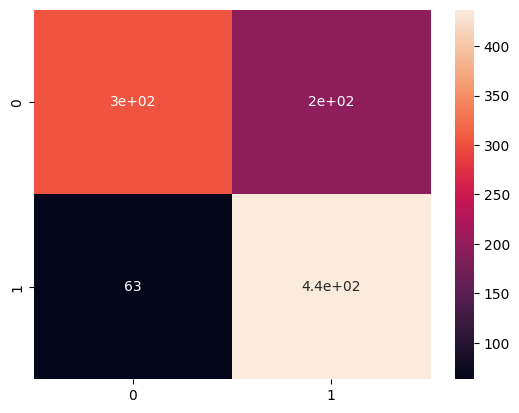

In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_dataset.classes, predictions)
sns.heatmap(cm, annot=True)

## Classifying one single image

In [24]:
#try different images
image = cv2.imread('/content/cat_dog_2/test_set/dog/dog.3535.jpg')
image1=cv2.imread('/content/cat_dog_2/test_set/cat/cat.3513.jpg')

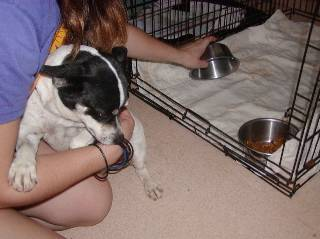

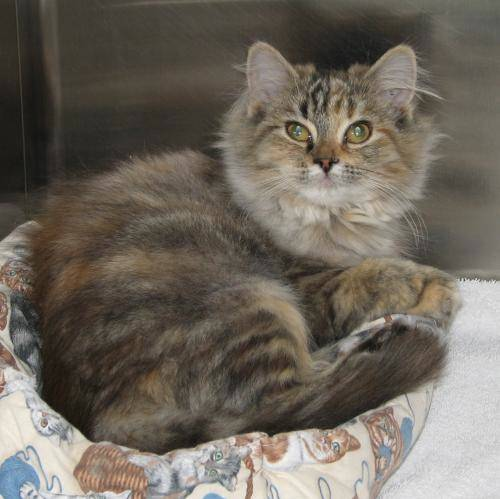

In [25]:
cv2_imshow(image)
cv2_imshow(image1)

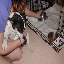

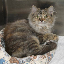

In [26]:
image = cv2.resize(image, (64, 64))
cv2_imshow(image)
image1 = cv2.resize(image1, (64, 64))
cv2_imshow(image1)

array([[[ 40,  50,  53],
        [ 40,  49,  53],
        [ 54,  58,  59],
        ...,
        [ 96, 107, 105],
        [ 98, 109, 107],
        [ 95, 106, 104]],

       [[ 38,  47,  51],
        [ 38,  47,  51],
        [ 45,  49,  50],
        ...,
        [ 89, 101,  98],
        [ 90, 101, 100],
        [ 86,  97,  95]],

       [[ 38,  47,  51],
        [ 37,  46,  50],
        [ 35,  45,  45],
        ...,
        [ 89,  94,  93],
        [ 90,  95,  94],
        [ 84,  89,  88]],

       ...,

       [[179, 145, 111],
        [188, 160, 119],
        [196, 161, 117],
        ...,
        [228, 228, 228],
        [219, 219, 219],
        [215, 215, 215]],

       [[177, 145, 110],
        [192, 156, 118],
        [156, 131,  99],
        ...,
        [218, 217, 217],
        [228, 226, 226],
        [218, 216, 216]],

       [[170, 151, 117],
        [192, 158, 119],
        [149, 119,  99],
        ...,
        [220, 218, 218],
        [220, 218, 218],
        [212, 210, 210]]], dtype=uint8)
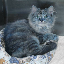

In [27]:

image1

array([[[176, 109, 108],
        [169, 102, 101],
        [175, 108, 107],
        ...,
        [  9,  15,  35],
        [ 15,  19,  37],
        [  9,   9,  25]],

       [[184, 117, 116],
        [185, 118, 118],
        [184, 117, 116],
        ...,
        [ 24,  31,  50],
        [  1,   6,  21],
        [  4,   5,  19]],

       [[185, 118, 117],
        [182, 115, 114],
        [181, 114, 113],
        ...,
        [ 33,  42,  56],
        [ 13,  19,  32],
        [  6,   8,  18]],

       ...,

       [[119, 135, 170],
        [117, 133, 169],
        [110, 125, 161],
        ...,
        [126, 138, 164],
        [112, 125, 151],
        [117, 131, 156]],

       [[125, 138, 170],
        [122, 135, 167],
        [120, 133, 165],
        ...,
        [124, 137, 163],
        [120, 134, 160],
        [116, 129, 155]],

       [[127, 138, 168],
        [127, 138, 168],
        [124, 135, 165],
        ...,
        [119, 132, 159],
        [116, 129, 155],
        [115, 128, 154]]], dtype=uint8)
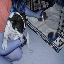

In [28]:
image

In [29]:
image = image / 255
image

array([[[0.69019608, 0.42745098, 0.42352941],
        [0.6627451 , 0.4       , 0.39607843],
        [0.68627451, 0.42352941, 0.41960784],
        ...,
        [0.03529412, 0.05882353, 0.1372549 ],
        [0.05882353, 0.0745098 , 0.14509804],
        [0.03529412, 0.03529412, 0.09803922]],

       [[0.72156863, 0.45882353, 0.45490196],
        [0.7254902 , 0.4627451 , 0.4627451 ],
        [0.72156863, 0.45882353, 0.45490196],
        ...,
        [0.09411765, 0.12156863, 0.19607843],
        [0.00392157, 0.02352941, 0.08235294],
        [0.01568627, 0.01960784, 0.0745098 ]],

       [[0.7254902 , 0.4627451 , 0.45882353],
        [0.71372549, 0.45098039, 0.44705882],
        [0.70980392, 0.44705882, 0.44313725],
        ...,
        [0.12941176, 0.16470588, 0.21960784],
        [0.05098039, 0.0745098 , 0.1254902 ],
        [0.02352941, 0.03137255, 0.07058824]],

       ...,

       [[0.46666667, 0.52941176, 0.66666667],
        [0.45882353, 0.52156863, 0.6627451 ],
        [0.43137255, 0

In [30]:
image1 = image1 / 255
image1

array([[[0.15686275, 0.19607843, 0.20784314],
        [0.15686275, 0.19215686, 0.20784314],
        [0.21176471, 0.22745098, 0.23137255],
        ...,
        [0.37647059, 0.41960784, 0.41176471],
        [0.38431373, 0.42745098, 0.41960784],
        [0.37254902, 0.41568627, 0.40784314]],

       [[0.14901961, 0.18431373, 0.2       ],
        [0.14901961, 0.18431373, 0.2       ],
        [0.17647059, 0.19215686, 0.19607843],
        ...,
        [0.34901961, 0.39607843, 0.38431373],
        [0.35294118, 0.39607843, 0.39215686],
        [0.3372549 , 0.38039216, 0.37254902]],

       [[0.14901961, 0.18431373, 0.2       ],
        [0.14509804, 0.18039216, 0.19607843],
        [0.1372549 , 0.17647059, 0.17647059],
        ...,
        [0.34901961, 0.36862745, 0.36470588],
        [0.35294118, 0.37254902, 0.36862745],
        [0.32941176, 0.34901961, 0.34509804]],

       ...,

       [[0.70196078, 0.56862745, 0.43529412],
        [0.7372549 , 0.62745098, 0.46666667],
        [0.76862745, 0

In [31]:
image1.shape

(64, 64, 3)

In [32]:
image.shape

(64, 64, 3)

In [33]:
image = image.reshape(-1, 64, 64, 3)
image.shape

(1, 64, 64, 3)

In [34]:
image1 = image1.reshape(-1, 64, 64, 3)
image1.shape

(1, 64, 64, 3)

In [35]:
result1 = network(image1)
result1

<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[0.71866924, 0.28133073]], dtype=float32)>

In [36]:
# Add a batch dimension to the image
image = image.reshape(1, 64, 64, 3)

# Now, predict using the reshaped image
result = network(image)
result

<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[0.15321817, 0.84678185]], dtype=float32)>

In [37]:
result1 = np.argmax(result)
result1

1

In [38]:
result = np.argmax(result)
result

1

In [39]:
test_dataset.class_indices

{'cat': 0, 'dog': 1}

In [42]:
if result1 == 0:
  print('cat')
else:
  print('dog')

dog


In [41]:
if result == 0:
  print('cat')
else:
  print('dog')

dog
